# 🚦 Navigation System using Graphs (Dijkstra's Algorithm)


Enter the starting point (e.g., A): A
Enter the destination point (e.g., E): E
🚗 Shortest distance from A to E: 6
🧭 Path: A ➝ C ➝ E


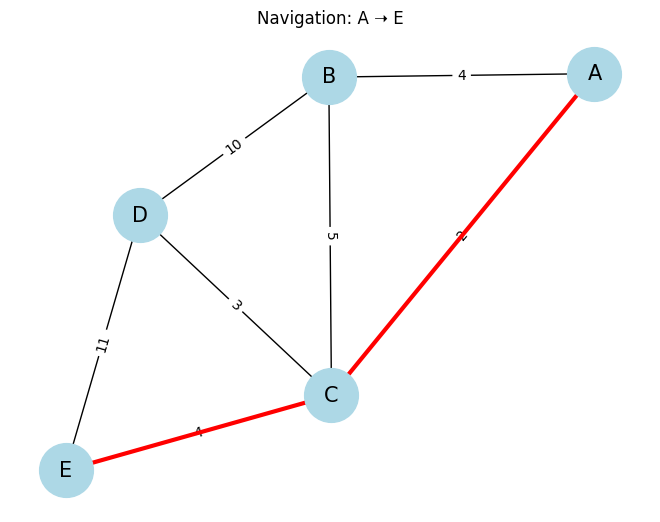

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph (city map with distances)
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 4},
    'D': {'B': 10, 'C': 3, 'E': 11},
    'E': {'C': 4, 'D': 11}
}

# Step 2: Dijkstra's algorithm
def dijkstra(graph, start, end):
    pq = [(0, start)]
    visited = set()
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    parent = {start: None}

    while pq:
        (current_distance, current_node) = heapq.heappop(pq)
        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                parent[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct path
    path = []
    node = end
    while node:
        path.append(node)
        node = parent[node]
    path.reverse()

    return dist[end], path

# Step 3: User input
start = input("Enter the starting point (e.g., A): ").upper()
end = input("Enter the destination point (e.g., E): ").upper()

if start not in graph or end not in graph:
    print("Invalid node(s). Please try again.")
else:
    distance, path = dijkstra(graph, start, end)
    print(f"🚗 Shortest distance from {start} to {end}: {distance}")
    print(f"🧭 Path: {' ➝ '.join(path)}")

    # Step 4: Visualize the graph and path

    G = nx.Graph()

    for node in graph:
        for neighbor in graph[node]:
            G.add_edge(node, neighbor, weight=graph[node][neighbor])

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight the path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=3)

    plt.title(f"Navigation: {start} ➝ {end}")
    plt.show()


 **In this we are defining some city names**

Available cities: Delhi, Agra, Jaipur, Kanpur, Bhopal
Enter the starting city (e.g., Delhi): Delhi
Enter the destination city (e.g., Bhopal): Kanpur
🚗 Shortest distance from Delhi to Kanpur: 523 km
🧭 Path: Delhi ➝ Agra ➝ Kanpur


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


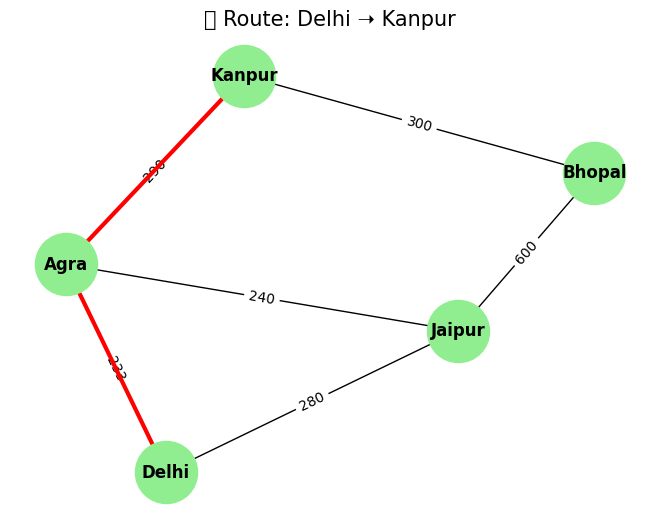

In [ ]:
# 🚦 City Navigation System using Graphs (Dijkstra's Algorithm with Visualization)

import heapq
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the graph using actual city names
graph = {
    'Delhi': {'Agra': 233, 'Jaipur': 280},
    'Agra': {'Delhi': 233, 'Kanpur': 290, 'Jaipur': 240},
    'Jaipur': {'Delhi': 280, 'Agra': 240, 'Bhopal': 600},
    'Kanpur': {'Agra': 290, 'Bhopal': 300},
    'Bhopal': {'Jaipur': 600, 'Kanpur': 300}
}

# Step 2: Dijkstra's Algorithm
def dijkstra(graph, start, end):
    pq = [(0, start)]
    visited = set()
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    parent = {start: None}

    while pq:
        (current_distance, current_node) = heapq.heappop(pq)
        if current_node in visited:
            continue
        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < dist[neighbor]:
                dist[neighbor] = distance
                parent[neighbor] = current_node
                heapq.heappush(pq, (distance, neighbor))

    # Reconstruct path
    path = []
    node = end
    while node:
        path.append(node)
        node = parent[node]
    path.reverse()

    return dist[end], path

# Step 3: User input
print("Available cities:", ', '.join(graph.keys()))
start = input("Enter the starting city (e.g., Delhi): ").strip().title()
end = input("Enter the destination city (e.g., Bhopal): ").strip().title()

# Step 4: Run Dijkstra and show result
if start not in graph or end not in graph:
    print("❌ Invalid city name(s). Please try again.")
else:
    distance, path = dijkstra(graph, start, end)
    print(f"🚗 Shortest distance from {start} to {end}: {distance} km")
    print(f"🧭 Path: {' ➝ '.join(path)}")

    # Step 5: Visualize the city graph

    G = nx.Graph()

    for node in graph:
        for neighbor in graph[node]:
            G.add_edge(node, neighbor, weight=graph[node][neighbor])

    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight shortest path in red

    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)

    plt.title(f"🗺️ Route: {start} ➝ {end}", fontsize=15)
    plt.show()


In [ ]:
from IPython.core.display import display, HTML

html_code = """
<!DOCTYPE html>
<html>
<head>
  <title>City Navigation System</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      padding: 20px;
      background-color: #f8f9fa;
    }
    h2 {
      color: #2c3e50;
    }
    select, button {
      font-size: 16px;
      padding: 10px;
      margin: 10px;
    }
    #result {
      background-color: #ecf0f1;
      padding: 15px;
      margin-top: 20px;
      border-radius: 8px;
    }
  </style>
</head>
<body>
  <h2>🚦 City Navigation System</h2>
  <label for="start">Select Start City:</label>
  <select id="start"></select>

  <label for="end">Select Destination City:</label>
  <select id="end"></select>

  <br>
  <button onclick="findShortestPath()">Find Shortest Path</button>

  <div id="result"></div>

  <script>
    const graph = {
      'Delhi': { 'Agra': 233, 'Jaipur': 280 },
      'Agra': { 'Delhi': 233, 'Kanpur': 290, 'Jaipur': 240 },
      'Jaipur': { 'Delhi': 280, 'Agra': 240, 'Bhopal': 600 },
      'Kanpur': { 'Agra': 290, 'Bhopal': 300 },
      'Bhopal': { 'Jaipur': 600, 'Kanpur': 300 }
    };

    const cities = Object.keys(graph);

    const startSelect = document.getElementById('start');
    const endSelect = document.getElementById('end');

    cities.forEach(city => {
      startSelect.add(new Option(city, city));
      endSelect.add(new Option(city, city));
    });

    function dijkstra(graph, start, end) {
      const dist = {};
      const visited = new Set();
      const pq = [[0, start]];
      const prev = {};

      for (let city in graph) dist[city] = Infinity;
      dist[start] = 0;

      while (pq.length > 0) {
        pq.sort((a, b) => a[0] - b[0]);
        const [curDist, node] = pq.shift();

        if (visited.has(node)) continue;
        visited.add(node);

        for (let neighbor in graph[node]) {
          const newDist = curDist + graph[node][neighbor];
          if (newDist < dist[neighbor]) {
            dist[neighbor] = newDist;
            prev[neighbor] = node;
            pq.push([newDist, neighbor]);
          }
        }
      }

      let path = [];
      let current = end;
      while (current !== undefined) {
        path.push(current);
        current = prev[current];
      }
      path.reverse();

      return { distance: dist[end], path };
    }

    function findShortestPath() {
      const start = startSelect.value;
      const end = endSelect.value;

      if (start === end) {
        document.getElementById('result').innerHTML = "<b>Start and destination cannot be the same.</b>";
        return;
      }

      const { distance, path } = dijkstra(graph, start, end);
      const resultHTML = `
        <h3>🧭 Shortest Path: ${start} ➝ ${end}</h3>
        <p><strong>Distance:</strong> ${distance} km</p>
        <p><strong>Path:</strong> ${path.join(" ➝ ")}</p>
      `;
      document.getElementById('result').innerHTML = resultHTML;
    }
  </script>
</body>
</html>
"""

display(HTML(html_code))
